<a href="https://colab.research.google.com/github/mehrnaznz/FirstTest/blob/main/Assignment_4_MehrnazNiazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [1]:
install.packages("beepr")
install.packages("tidyverse")
install.packages("sjPlot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




In [2]:
library(beepr)
library(tidyverse)
library(sjPlot)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘sjPlot’


The following object is masked from ‘package:ggplot2’:

    set_theme




In [3]:
beep("mario")


Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [5]:
#read the csv file and
data  = read.csv("/home/Hummingbird_data.csv", stringsAsFactors = FALSE)


In [6]:
colnames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

In [7]:
list.files("/content")


[1] "sample_data"

**Q2. How many rows and columns are in the datafame**  
1 point

rows: 6908 columns: 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [11]:
str(data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [12]:
# Identify data types of each column
data_types = sapply(data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [13]:
library(dplyr)
model_data = sample_n(data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

rows: 5000 columns:12

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

categorical: 9
continuous: 1

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [14]:
write.csv(model_data, "/home/Hummingbird_data_MehrnazNiazi.csv", row.names = FALSE)

In [15]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [16]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4179
Santa Barbara,63
malibu,758


In [17]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [18]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

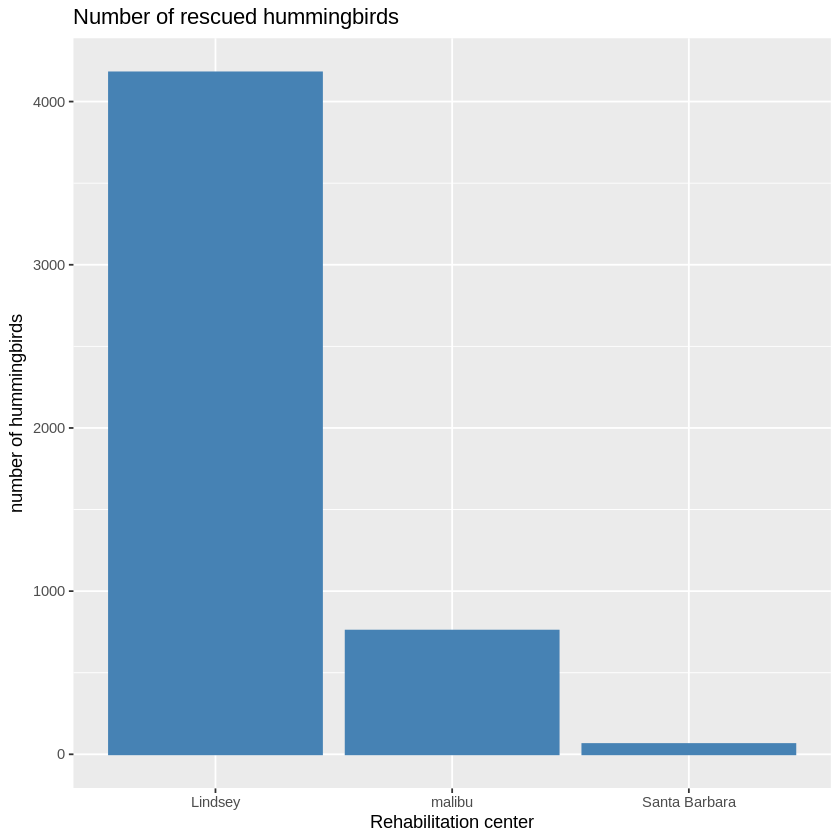

In [19]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [20]:
pdf("/home/rehab_hummingbirds_plot.pdf", width = 4, height = 3)
#print(p)
dev.off()


agg_record_1996475020 
                    2

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

group_by(Place)--> groups the dataset by rehabilitation center.

summarise(count = n_distinct(ID))--> calculates the number of unique birds treated at each center.

ggplot(rehab, aes(...))--> initializes the plot using the summary table.

geom_bar(stat = "identity")--> creates bars whose heights represent the actual counts (not computed automatically).

xlab() and ylab()--> label the axes.

labs(title = ...)--> gives the plot a descriptive title.

The object p --> stores the plot, which I then saved to PDF.

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

Based on the tables and bar plots for Age_e, Sex_e, Place, F_Aid, and season, several patterns appear related to hummingbird survival.

Age_e shows noticeable differences between categories; some age groups have higher proportions of death, suggesting that age may influence survival. Sex_e appears less strongly associated, as male-like and female-like categories often show similar release vs. death patterns. Place (rehabilitation center) shows clear variation: some centers have much higher release rates, while others have more deaths, possibly reflecting differences in caseload or resources. F_Aid is strongly associated with survival: birds that received first aid tend to have higher release proportions. Season also appears to matter, with some seasons showing higher mortality, likely due to migration stress or weather conditions.

Not all covariates show equal association, but Age_e, Place, F_Aid, and season show stronger visual patterns than Sex_e.

For statistical testing, chi-square tests or Fisher’s exact tests could evaluate associations for categorical variables, and logistic regression could quantify the effects more formally.


In [21]:
df = model_data  %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(Age_e, Disposition_binary))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [22]:
df

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,1
Nestling,Released,1
adult-like,Died,1
adult-like,Released,1


Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,425
Nestling,Released,773
adult-like,Died,2767
adult-like,Released,1035


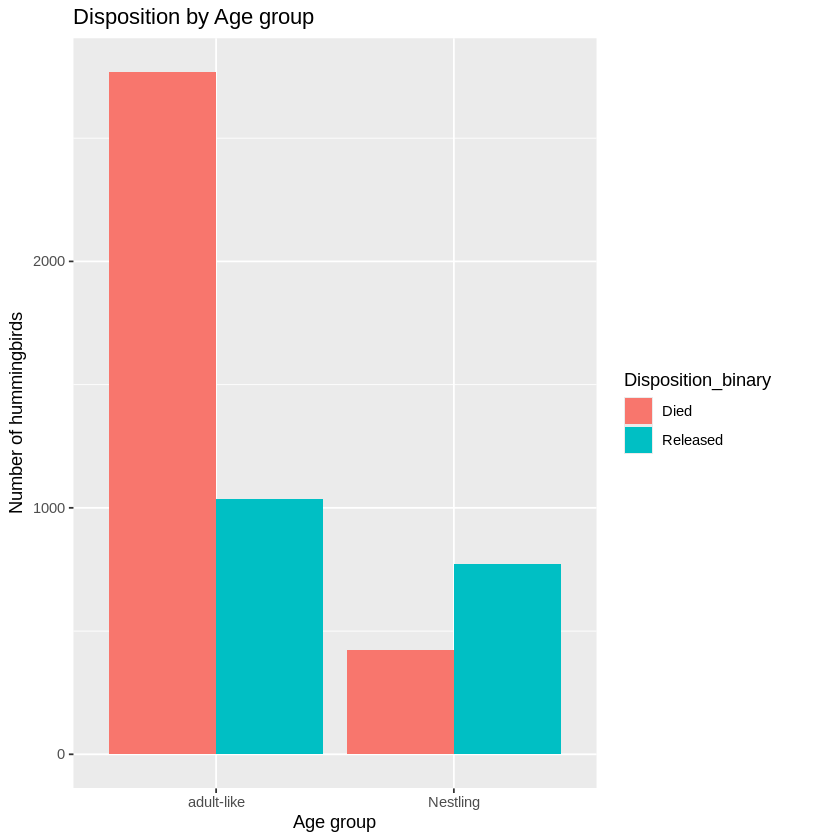

In [24]:
df_age = model_data %>%
  group_by(Age_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_age

ggplot(df_age, aes(x = Age_e, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by Age group",
       x = "Age group",
       y = "Number of hummingbirds")


Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2318
Female-like,Released,921
Male,Died,443
Male,Released,114
unknown,Died,431
unknown,Released,773


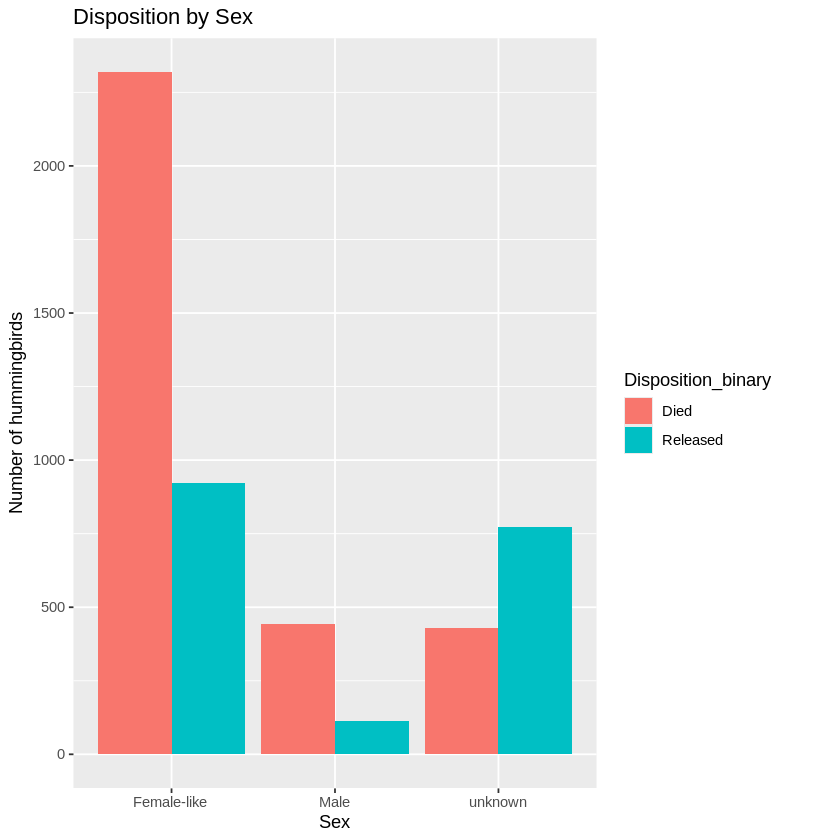

In [25]:
df_sex = model_data %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_sex

ggplot(df_sex, aes(x = Sex_e, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by Sex",
       x = "Sex",
       y = "Number of hummingbirds")


Place,Disposition_binary,count
<chr>,<chr>,<int>
Lindsey,Died,2695
Lindsey,Released,1484
Santa Barbara,Died,38
Santa Barbara,Released,25
malibu,Died,459
malibu,Released,299


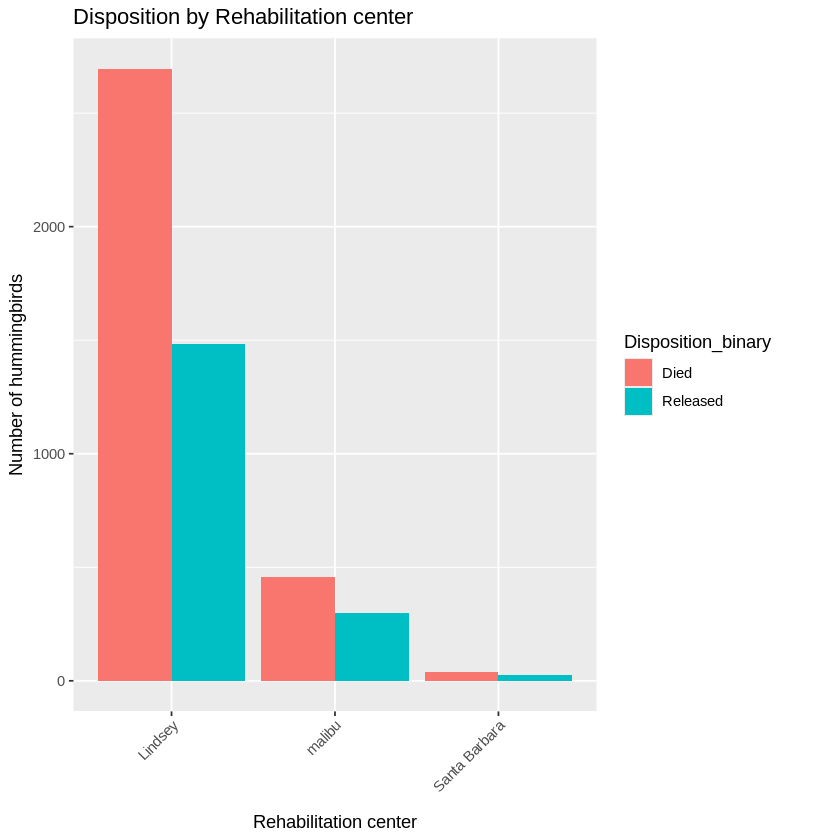

In [26]:
df_place = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_place

ggplot(df_place, aes(x = Place, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by Rehabilitation center",
       x = "Rehabilitation center",
       y = "Number of hummingbirds") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2092
No,Released,1191
Yes,Died,1100
Yes,Released,617


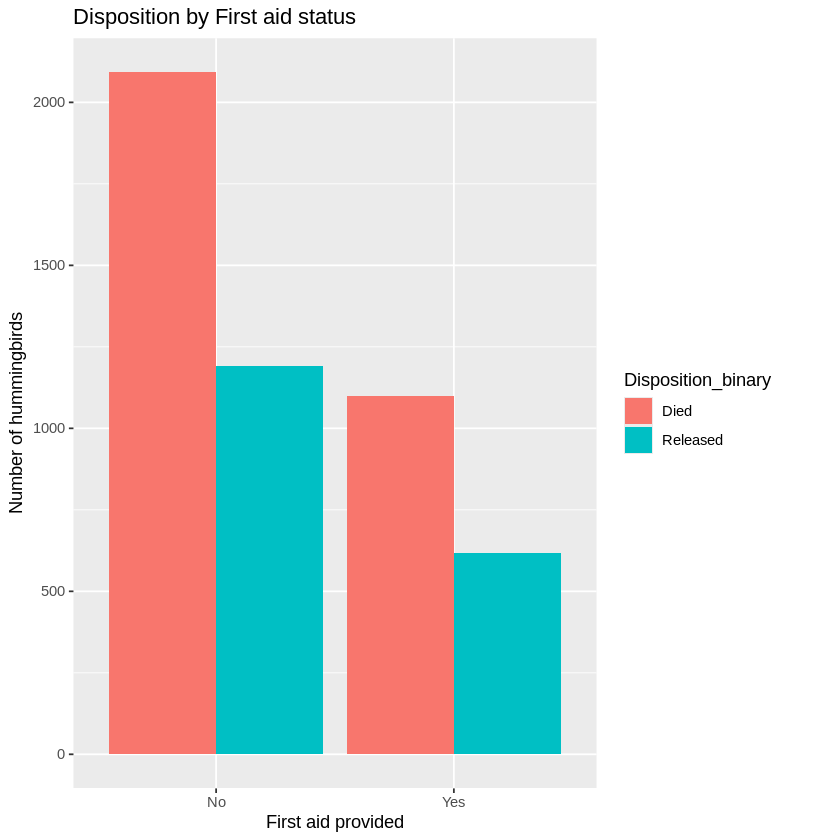

In [27]:
df_faid = model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_faid

ggplot(df_faid, aes(x = F_Aid, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by First aid status",
       x = "First aid provided",
       y = "Number of hummingbirds")


season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,382
Fall,Released,56
Spring,Died,1294
Spring,Released,952
Summer,Died,956
Summer,Released,603
Winter,Died,560
Winter,Released,197


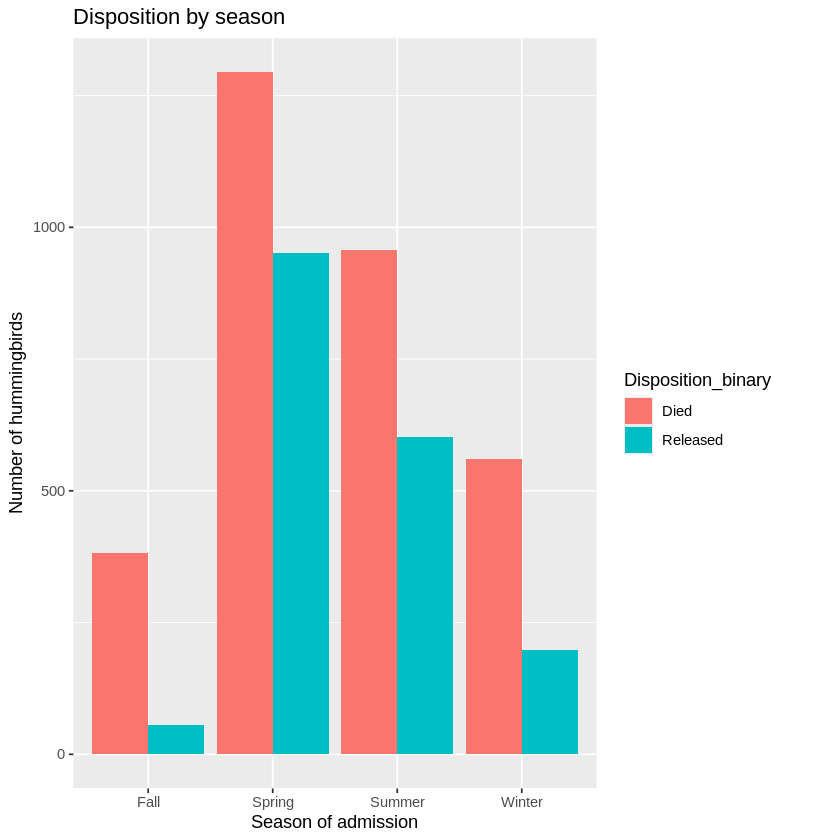

In [28]:
df_season = model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_season

ggplot(df_season, aes(x = season, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by season",
       x = "Season of admission",
       y = "Number of hummingbirds")


## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

The table shows the proportion of hummingbirds that were released versus died for each rehabilitation center. Some centers have noticeably higher release proportions, while others show a larger proportion of deaths. This suggests differences in caseload, resources, or bird condition upon admission. The bar chart makes these center-specific differences visually clear.


Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2695,0.6448911
Lindsey,Released,1484,0.3551089
Santa Barbara,Died,38,0.6031746
Santa Barbara,Released,25,0.3968254
malibu,Died,459,0.6055409
malibu,Released,299,0.3944591


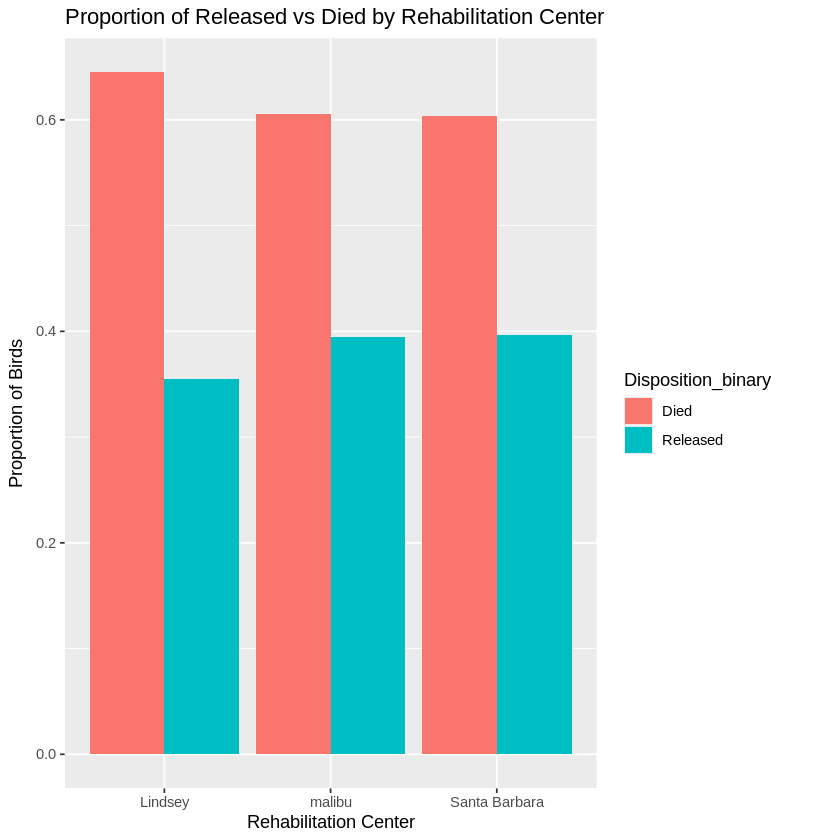

In [29]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop") %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))
proportions


# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary )) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion of Birds") +
  labs(title = "Proportion of Released vs Died by Rehabilitation Center" )

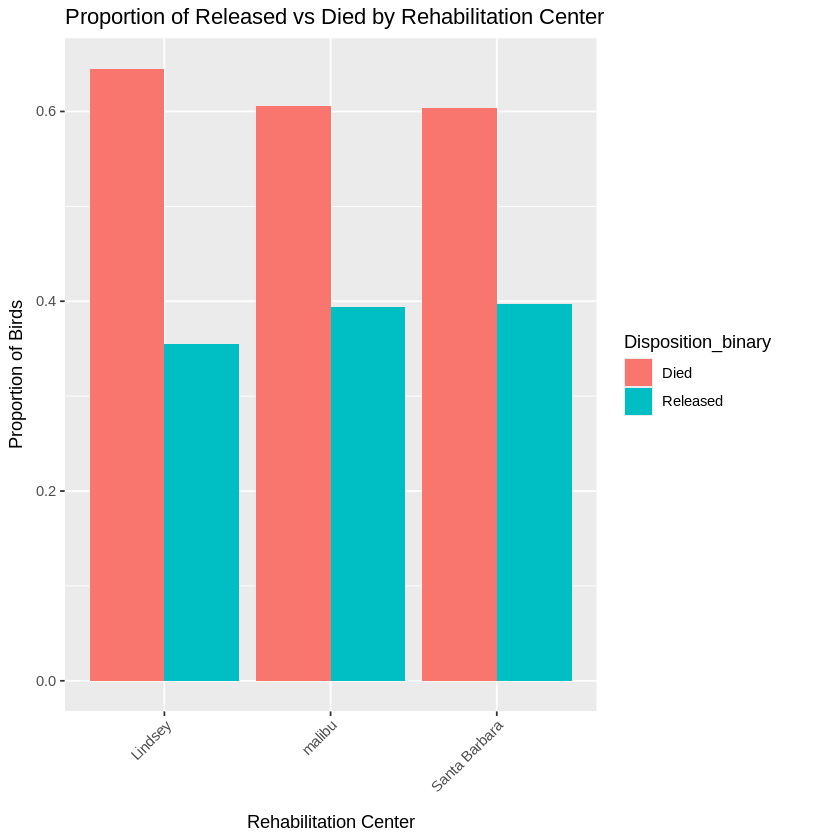

In [30]:
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion of Birds") +
  labs(title = "Proportion of Released vs Died by Rehabilitation Center") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

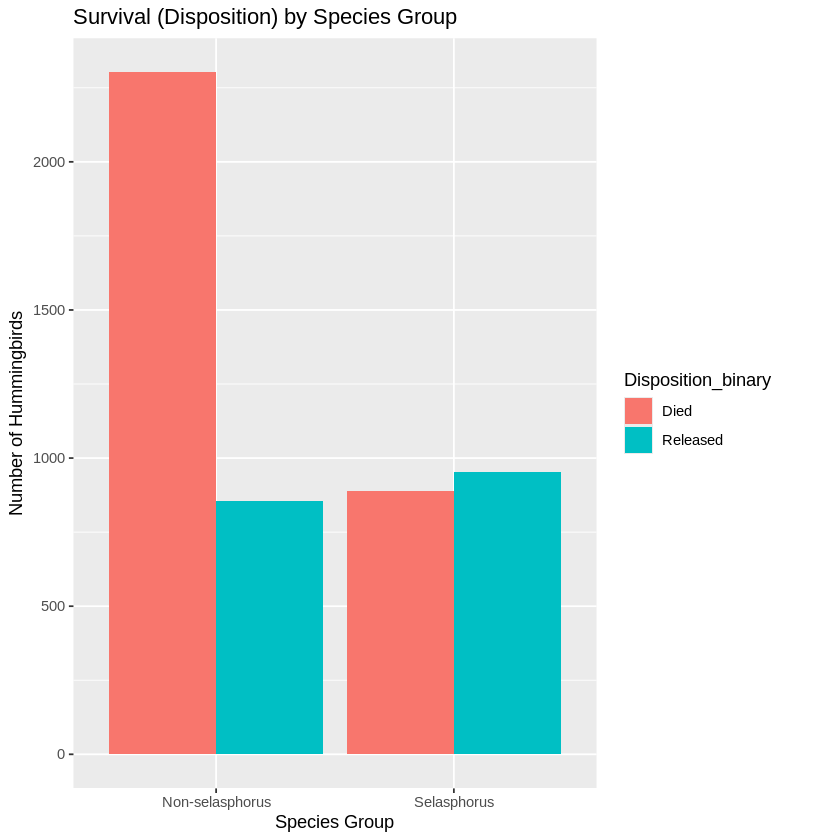

In [31]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e %in% c("ANHU", "BCHU", "NonSselasphorus"),
       "Non-selasphorus",
       "Selasphorus")


# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(species_distribution,
       aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Survival (Disposition) by Species Group" )

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [32]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")


Q12a Please explain the argument `format` in code above

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [33]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))
admissions_by_month

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))
admissions_by_year


Admitted_month,count
<chr>,<int>
1991-01,11
1991-02,3
1991-03,21
1991-04,31
1991-05,16
1991-06,26
1991-07,14
1991-08,12
1991-09,7


Admitted_year,count
<chr>,<int>
1991,148
1992,135
1993,137
1994,133
1995,146
1996,146
1997,138
1998,151
1999,141


Finally, we can use `ggplot` to plot these timelines.

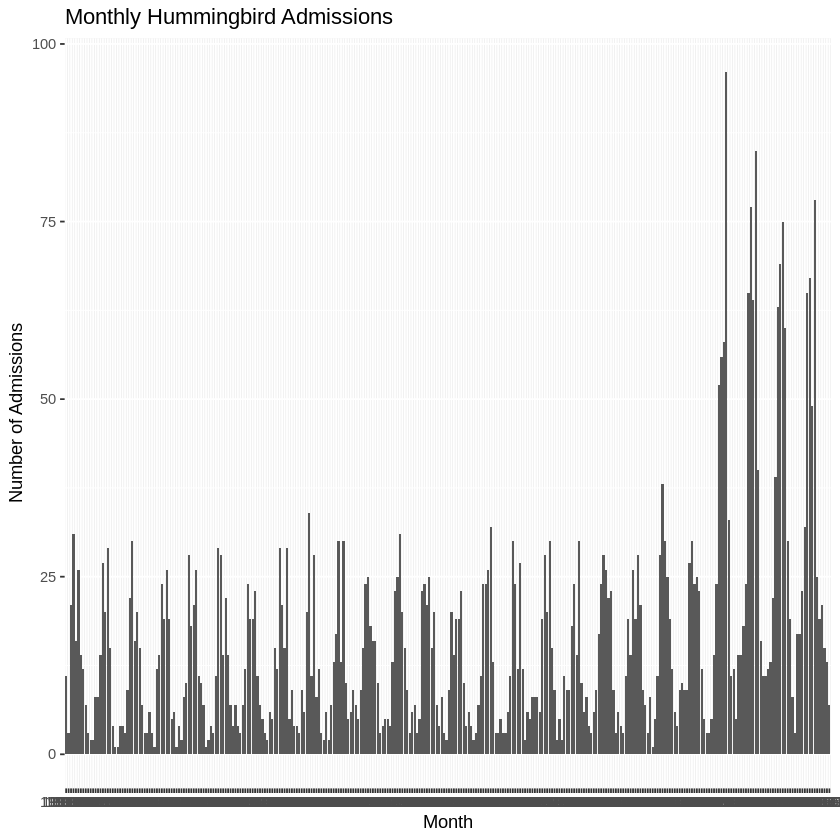

In [34]:
# Plot admissions by month
ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Month") +
  ylab("Number of Admissions") +
  labs(title = "Monthly Hummingbird Admissions")


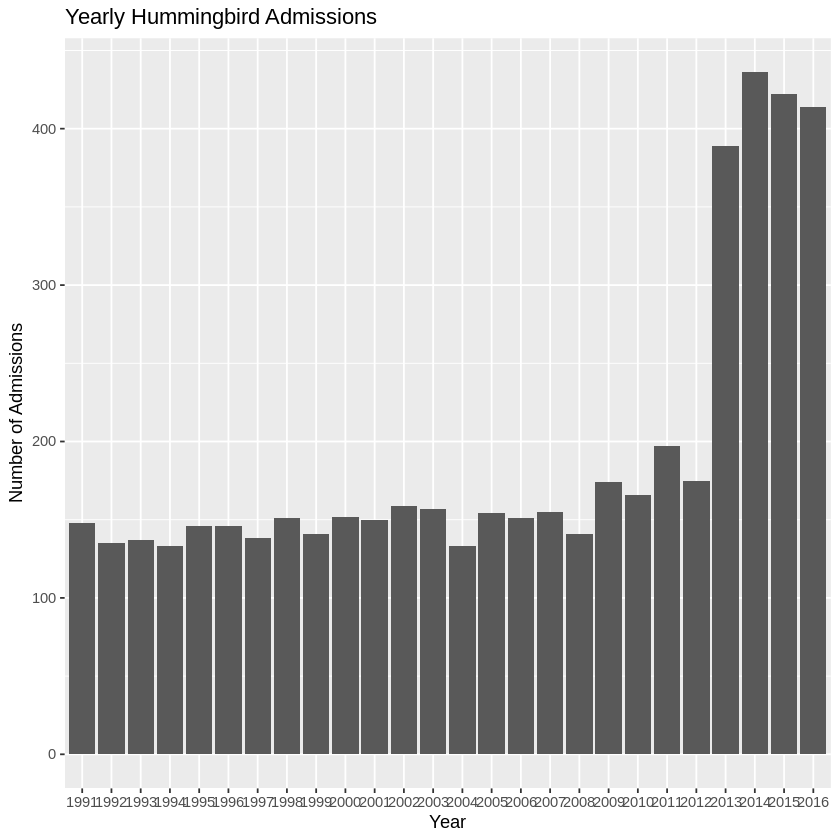

In [35]:
# Plot admissions by year
ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Year") +
  ylab("Number of Admissions") +
  labs(title = "Yearly Hummingbird Admissions")

#session8

In [50]:
model_data$Disposition_binary = as.factor(model_data$Disposition_binary)

# Full logistic regression model
fullmodel = glm(Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e, data = model_data, family = binomial(link = "logit"))

fullmodel


Call:  glm(formula = Disposition_binary ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                    -2.04200                       0.20358  
        rfound on the ground                 rnest-related  
                     0.15004                       0.51348  
  rsuspect torpor-like state                      runknown  
                    -1.18733                       0.36032  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                    -0.10952                       0.23085  
                seasonSpring                  seasonSummer  
                     1.19934                       1.07144  
                seasonWinter                      F_AidYes  
                     0.66548                      -0.05948  
               Species_eBCHU      Species_eNon-selasphorus  
                     0.55549               

In [51]:
backward_model = step(fullmodel, k = 2, direction = "backward", test = "Chisq")

Start:  AIC=5975.1
Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5975.1
Disposition_binary ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
- F_Aid      1   5947.9 5973.9   0.797    0.3719    
<none>           5947.1 5975.1                      
- r          6   5995.2 6011.2  48.104 1.126e-08 ***
- season     3   6039.5 6061.5  92.433 < 2.2e-16 ***
- Species_e  3   6154.1 6176.1 206.958 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=5973.9
Disposition_binary ~ r + season + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5947.9 5973.9                      
- r          6   5996.1 6010.1  48.237 1.059e-08 ***
- season     3   6040.1 6060.1  92.247 < 2.2e-16 ***
- Species_e  3   6154.8 6174.8 206.875 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [52]:
null_model = glm(Disposition_binary ~ 1, data = model_data, family = binomial(link = "logit"))

In [53]:
forward_model = step(null_model, scope = ~ r + Green_Orange + season + F_Aid + Species_e, k = 2, direction = "forward", test = "Chisq")


Start:  AIC=6545.33
Disposition_binary ~ 1

               Df Deviance    AIC    LRT Pr(>Chi)    
+ Species_e     3   6099.3 6107.3 444.02   <2e-16 ***
+ r             6   6288.2 6302.2 255.14   <2e-16 ***
+ season        3   6344.8 6352.8 198.52   <2e-16 ***
<none>              6543.3 6545.3                    
+ Green_Orange  1   6542.9 6546.9   0.41   0.5222    
+ F_Aid         1   6543.3 6547.3   0.06   0.8105    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=6107.31
Disposition_binary ~ Species_e

         Df Deviance    AIC     LRT  Pr(>Chi)    
+ season  3   5996.1 6010.1 103.173 < 2.2e-16 ***
+ r       6   6040.1 6060.1  59.164 6.653e-11 ***
<none>        6099.3 6107.3                      
+ F_Aid   1   6098.6 6108.6   0.680    0.4096    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=6010.14
Disposition_binary ~ Species_e + season

        Df Deviance    AIC    LRT  Pr(>Chi)    
+ r      6   5947.9 5973.9 48.237

In [56]:
names(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

In [47]:
length(names(backward_model))

[1] 31

Q1: How many model properties are available?

31 MODELS.
'coefficients''residuals''fitted.values''effects''R''rank''qr''family''linear.predictors''deviance''aic''null.deviance''iter''weights''prior.weights''df.residual''df.null''y''converged''boundary''model''call''formula''terms''data''offset''control''method''contrasts''xlevels''anova'


In [63]:
library(sjPlot)

In [70]:
model_table = tab_model(backward_model)
print(model_table)

View(model_table)

In [66]:
model_summary = summary(backward_model)
coefficients = model_summary$coefficients
odds_ratios = exp(coefficients[, "Estimate"])

# Create a data frame for better display
odds_ratio_table = data.frame(
  Variable = names(odds_ratios),
  Odds_Ratio = as.numeric(odds_ratios)
)

print("Odds Ratios for backward_model:")
print(odds_ratio_table)

[1] "Odds Ratios for backward_model:"
                     Variable Odds_Ratio
1                 (Intercept)  0.1272900
2               rfound inside  1.2281283
3        rfound on the ground  1.1561527
4               rnest-related  1.6698929
5  rsuspect torpor-like state  0.3059298
6                    runknown  1.4417205
7                 rwindow hit  0.9003104
8                seasonSpring  3.3181096
9                seasonSummer  2.9196516
10               seasonWinter  1.9500340
11              Species_eBCHU  1.7473781
12   Species_eNon-selasphorus  3.4457482
13       Species_eSelasphorus  1.2556956


Q2: Which variable has the highest odds ratio for survival?

  Species_eNon-selasphorus

Q3: Do the calculated odds ratios match the values provided by sjPlot?